## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load dataset

In [2]:
raw = pd.read_csv('car_prices.csv', on_bad_lines='skip')
raw.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Data Preprocessing

### Data Cleansing

In [3]:
df = raw.copy()
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


#### Drop Columns

In [5]:
drop = ['trim','vin','seller'] #model dan trim cek lagi
df_drop = df.drop(drop, axis=1)
df_drop

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,black,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,beige,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,Sedan,automatic,ca,4.5,1331.0,gray,black,31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,Sedan,automatic,ca,4.1,14282.0,white,black,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,4.3,2641.0,gray,black,66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Sedan,NaN,in,4.5,18255.0,silver,black,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Crew Cab,automatic,wa,5.0,54393.0,white,black,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,SUV,automatic,ca,4.8,50561.0,black,black,29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,sedan,automatic,ga,3.8,16658.0,white,black,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


#### Missing Data

In [6]:
df_nan = df_drop.copy()
df_nan.isna().sum()

year                0
make            10301
model           10399
body            13195
transmission    65353
state               0
condition       11794
odometer           94
color             749
interior          749
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [7]:
drop_miss = []
for i in df_nan:
    nan_perc = round(100*df_nan[i].isna().sum()/df_nan.shape[0],2)
    if nan_perc < 10:
        drop_miss.append(i)
    print('missing value {} : {}'.format(i,nan_perc))
print(drop_miss) #coba dicek satu baris yang kosong apa aja
#groupby yang categorical buat liat hubungan yang categorical sama target (stage_1)

missing value year : 0.0
missing value make : 1.84
missing value model : 1.86
missing value body : 2.36
missing value transmission : 11.7
missing value state : 0.0
missing value condition : 2.11
missing value odometer : 0.02
missing value color : 0.13
missing value interior : 0.13
missing value mmr : 0.0
missing value sellingprice : 0.0
missing value saledate : 0.0
['year', 'make', 'model', 'body', 'state', 'condition', 'odometer', 'color', 'interior', 'mmr', 'sellingprice', 'saledate']


In [8]:
df_nan = df_nan.dropna(subset=drop_miss)
df_nan.isna().sum()

year                0
make                0
model               0
body                0
transmission    61324
state               0
condition           0
odometer            0
color               0
interior            0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [9]:
df_nan['transmission'].fillna(df_nan['transmission'].mode()[0],inplace=True) #alternatif isi na lihat dari fitur lain
df_nan.isna().sum()

year            0
make            0
model           0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
saledate        0
dtype: int64

#### Duplicated Data

In [10]:
df_duplicated = df_nan.copy()
df_duplicated.duplicated().sum() #no row is a duplicate, yay!

0

#### Outliers

In [11]:
from scipy import stats 

df_outliers = df_duplicated.copy()
nums = ['year','condition','odometer','mmr','sellingprice']

print(f'Jumlah baris sebelum memfilter outlier: {len(df_outliers)}')

filtered_entries = np.array([True] * len(df_outliers))

for col in nums:
    zscore = abs(stats.zscore(df_outliers[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_outliers = df_outliers[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_outliers)}') #cek yang dihapus data seperti apa, hubungan antar fitur, masuk akal gak

Jumlah baris sebelum memfilter outlier: 533660
Jumlah baris setelah memfilter outlier: 517124


In [12]:
outliers = df_duplicated.shape[0]-df_outliers.shape[0]
outliers

16536

In [13]:
outliers/df_duplicated.shape[0]*100

3.0986021062099462

### Feature Engineering

#### Log Transformation

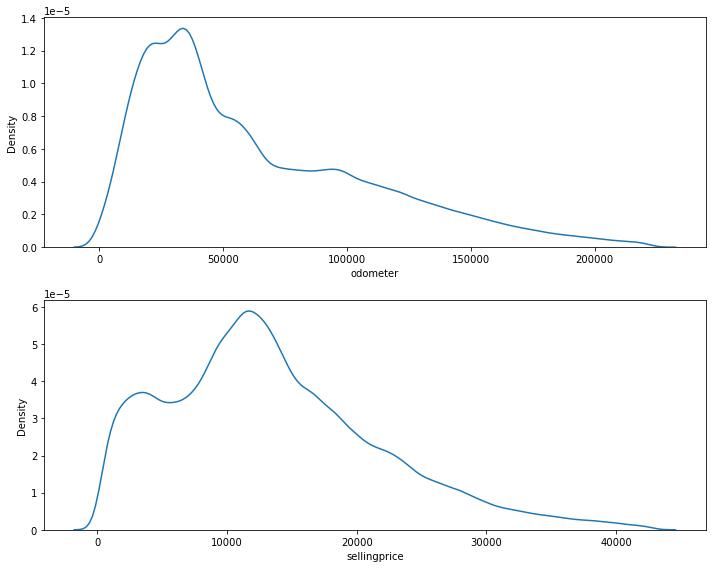

In [14]:
df_log = df_outliers.copy()

fig, axes = plt.subplots(2, figsize=(10,8))
sns.kdeplot(x=df_log['odometer'], ax=axes[0])
sns.kdeplot(x=df_log['sellingprice'], ax=axes[1])
plt.tight_layout()

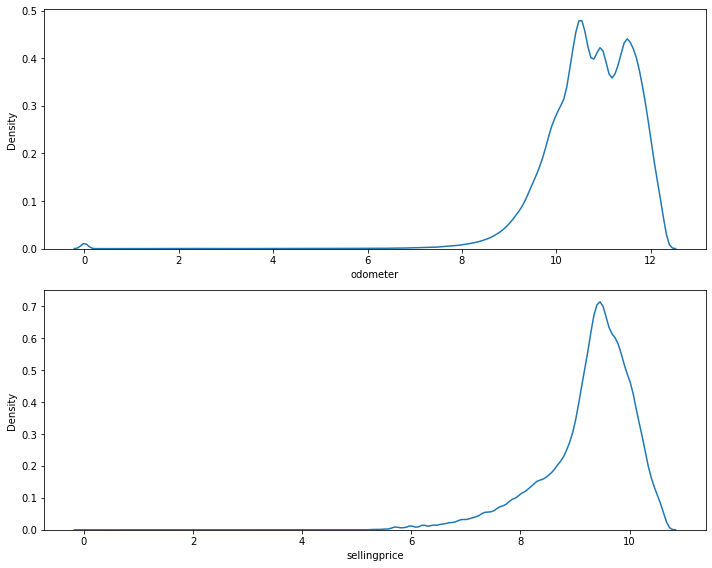

In [15]:
fig, axes = plt.subplots(2, figsize=(10,8))
sns.kdeplot(x=np.log(df_log['odometer']), ax=axes[0])
sns.kdeplot(x=np.log(df_log['sellingprice']), ax=axes[1])
plt.tight_layout()

#### Normalization/Standardization

#### Feature Encoding Preparation

In [16]:
df_encode = df_log.copy()
df_encode['make'] = df_encode['make'].str.lower()
df_encode['body'] = df_encode['body'].str.lower()
df_encode['state'] = df_encode['state'].str.lower()
df_encode['model'] = df_encode['model'].str.lower()
df_encode.describe(include='object')

,make,model,body,transmission,state,color,interior,saledate
count,517124,517124,517124,517124,517124,517124,517124,517124
unique,47,682,43,2,38,20,17,3645
top,ford,altima,sedan,automatic,fl,black,black,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,89958,19006,230105,501682,76991,102776,233206,5120


In [17]:
# make = df_encode.groupby('make').agg({'sellingprice':'count'}).reset_index().sort_values('make')
# make.columns = ['make','car_sold']
# make

In [18]:
# df_encode.loc[df_encode['make'].str.contains('chev',na=False), 'make'] = 'chevrolet'
# df_encode.loc[df_encode['make'].str.contains('dodge',na=False), 'make'] = 'dodge'
# df_encode.loc[df_encode['make'].str.contains('mazda',na=False), 'make'] = 'mazda'
# df_encode.loc[df_encode['make'].str.contains('hyundai',na=False), 'make'] = 'hyundai'
# df_encode.loc[df_encode['make'].str.contains('ford',na=False), 'make'] = 'ford'
# df_encode.loc[df_encode['make'].str.contains('mercedes',na=False), 'make'] = 'mercedes-benz'
# df_encode.loc[df_encode['make'].str.contains('vw',na=False), 'make'] = 'volkswagen'
# df_encode.loc[df_encode['make'].str.contains('gmc',na=False), 'make'] = 'gmc'
# df_encode.loc[df_encode['make'].str.contains('landrover',na=False), 'make'] = 'land rover'

In [19]:
# make_count = df.groupby('make').agg({'sellingprice':'count'}).reset_index().sort_values('sellingprice')
# make_count.columns = ['make','sellingprice']
# top_make = make_count[make_count['sellingprice']>10000]['make'].to_list()
# top_make

In [20]:
# df['make'] = np.where(df['make'].isin(top_make),df['make'],'others')

In [21]:
# plt.figure(figsize=(15,10))
# sns.countplot(df['make'].sort_values(ascending=False))

In [22]:
df_encode.loc[df_encode['body'].str.contains('convertible',na=False), 'body'] = 'convertible'
df_encode.loc[df_encode['body'].str.contains('cab',na=False), 'body'] = 'cab'
df_encode.loc[df_encode['body'].str.contains(' van',na=False), 'body'] = 'van'
df_encode.loc[df_encode['body'].str.contains('wagon',na=False), 'body'] = 'wagon'
df_encode.loc[df_encode['body'].str.contains('coupe',na=False), 'body'] = 'coupe'
df_encode.loc[df_encode['body'].str.contains('koup',na=False), 'body'] = 'coupe'
df_encode.loc[df_encode['body'].str.contains('sedan',na=False), 'body'] = 'sedan'
df_encode['body'].unique().shape[0] #unique value untuk body
#cek hubungan dengan target (mean, median, percentile)

10

In [23]:
df_encode['state'].unique()

array(['ca', 'tx', 'mn', 'az', 'wi', 'tn', 'fl', 'nj', 'ga', 'va', 'in',
       'il', 'mi', 'oh', 'co', 'ut', 'mo', 'pa', 'ne', 'nv', 'ma', 'pr',
       'nc', 'sc', 'ny', 'or', 'md', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'nm', 'ms', 'al', 'ns'], dtype=object)

In [24]:
west = ['wa','or','ca','mt','id','nv','wy','ut','az','co','nm','hi','ak']
south = ['ok','tx','ar','la','ms','al','tn','ky','wv','dc','md','md','va','nc','sc','ga','fl']
northeast = ['me','nh','vt','ma','ct','ri','nj','ny','pa']
midwest = ['nd','sd','ne','ks','mn','ia','mo','wi','il','in','mi','oh']
us = [west,south,northeast,midwest]
us_states = 0
for i in us:
    us_states = us_states + len(i)
us_states #cek deskriptif statistik terhadap target

51

In [25]:
df_encode.loc[df_encode['state'].isin(west), 'state'] = 'west'
df_encode.loc[df_encode['state'].isin(south), 'state'] = 'south'
df_encode.loc[df_encode['state'].isin(northeast), 'state'] = 'northeast'
df_encode.loc[df_encode['state'].isin(midwest), 'state'] = 'midwest'
df_encode.loc[~df_encode['state'].isin(['west','south','northeast','midwest']),'state'] = 'outside_us'
df_encode['state'].unique()

array(['west', 'south', 'midwest', 'northeast', 'outside_us'],
      dtype=object)

In [26]:
df_encode['state'].value_counts()

south         219859
west          104137
midwest        97770
northeast      88245
outside_us      7113
Name: state, dtype: int64

In [27]:
df_encode['state'].unique().shape[0]

5

In [28]:
df_encode['day'] = df_encode['saledate'].str.split(' ').str[0]
df_encode['month'] = df_encode['saledate'].str.split(' ').str[1]
df_encode['date'] = df_encode['saledate'].str.split(' ').str[2].astype(int)
df_encode.drop('saledate',axis=1,inplace=True)
df_encode.head() #bisa didrop

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,day,month,date
0,2015,kia,sorento,suv,automatic,west,5.0,16639.0,white,black,20500,21500,Tue,Dec,16
1,2015,kia,sorento,suv,automatic,west,5.0,9393.0,white,beige,20800,21500,Tue,Dec,16
2,2014,bmw,3 series,sedan,automatic,west,4.5,1331.0,gray,black,31900,30000,Thu,Jan,15
3,2015,volvo,s60,sedan,automatic,west,4.1,14282.0,white,black,27500,27750,Thu,Jan,29
5,2015,nissan,altima,sedan,automatic,west,1.0,5554.0,gray,black,15350,10900,Tue,Dec,30


In [29]:
df_encode['day'].unique()

array(['Tue', 'Thu', 'Wed', 'Fri', 'Mon', 'Sat', 'Sun'], dtype=object)

In [30]:
df_encode['month'].unique()

array(['Dec', 'Jan', 'Jul', 'Feb', 'Jun', 'May', 'Mar', 'Apr'],
      dtype=object)

In [31]:
df_encode['date'].unique().shape[0]

31

In [32]:
model_med = df_encode.groupby(['model']).agg({'sellingprice':'median'}).sort_values('sellingprice').reset_index()
model_med.columns = ['model','median_price']
model_med.sample(10)

,model,median_price
33,cabrio,1000.0
661,q60 convertible,36400.0
15,concorde,800.0
579,ls 460,24100.0
446,sorento,16000.0
341,h3,11500.0
590,impreza wrx,24950.0
373,s2000,12950.0
97,echo,2100.0
276,mazdaspeed mazda3,9000.0


In [33]:
def model_rank(x):
    if x <= model_med['median_price'].quantile(0.1):
        return 'rank_10'
    elif x <= model_med['median_price'].quantile(0.2):
        return 'rank_9'
    elif x <= model_med['median_price'].quantile(0.3):
        return 'rank_8'
    elif x <= model_med['median_price'].quantile(0.4):
        return 'rank_7'
    elif x <= model_med['median_price'].quantile(0.5):
        return 'rank_6'
    elif x <= model_med['median_price'].quantile(0.6):
        return 'rank_5'
    elif x <= model_med['median_price'].quantile(0.7):
        return 'rank_4'
    elif x <= model_med['median_price'].quantile(0.8):
        return 'rank_3'
    elif x <= model_med['median_price'].quantile(0.9):
        return 'rank_2'
    elif x > model_med['median_price'].quantile(0.9):
        return 'rank_1'
    else:
        return 'no_rank'

In [34]:
model_med['rank'] = model_med['median_price'].apply(lambda x: model_rank(x))
model_med.sample(10)

,model,median_price,rank
383,lr2,13250.0,rank_5
49,explorer sport,1200.0,rank_10
204,element,5900.0,rank_8
38,grand am,1000.0,rank_10
574,5 series,23750.0,rank_2
82,xg350,1700.0,rank_9
407,mustang,14275.0,rank_5
112,i35,2500.0,rank_9
419,equator,14850.0,rank_4
53,aerio,1225.0,rank_10


In [35]:
df_encode = df_encode.merge(model_med,on='model',how='inner')

In [36]:
df_encode = df_encode.drop(['model','median_price'],axis=1)
df_encode.sample(5)

,year,make,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,day,month,date,rank
12522,2014,nissan,sedan,automatic,west,5.0,5665.0,white,black,15350,16600,Wed,Dec,31,rank_5
253016,2013,dodge,sedan,automatic,south,3.5,64501.0,gray,black,9325,9500,Wed,Dec,24,rank_6
488802,2006,chevrolet,suv,automatic,south,1.0,115149.0,gray,gray,4300,2400,Tue,Mar,3,rank_8
181870,2013,toyota,minivan,automatic,west,3.5,13274.0,gray,beige,26900,28000,Wed,Jan,21,rank_4
465534,2007,ford,cab,automatic,south,4.1,89067.0,blue,tan,12500,13200,Wed,Jan,28,rank_7


In [37]:
df_encode.describe(include='object')

,make,body,transmission,state,color,interior,day,month,rank
count,517124,517124,517124,517124,517124,517124,517124,517124,517124
unique,47,10,2,5,20,17,7,8,10
top,ford,sedan,automatic,south,black,black,Wed,Feb,rank_5
freq,89958,237516,501682,219859,102776,233206,155762,154140,116545


#### Feature Encoding

In [38]:
df_onehot = df_encode.copy()
for cat in ['make', 'body','transmission','state','color','interior','day','month','rank']:
    onehots = pd.get_dummies(df_onehot[cat], prefix=cat)
    df_onehot = df_onehot.join(onehots)

In [39]:
df_onehot = df_onehot.drop(['make', 'body','transmission','state','color','interior','day','month','rank'],axis=1)
df_onehot.head()

,year,condition,odometer,mmr,sellingprice,date,make_acura,make_aston martin,make_audi,make_bentley,...,rank_rank_1,rank_rank_10,rank_rank_2,rank_rank_3,rank_rank_4,rank_rank_5,rank_rank_6,rank_rank_7,rank_rank_8,rank_rank_9
0,2015,5.0,16639.0,20500,21500,16,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2015,5.0,9393.0,20800,21500,16,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2015,5.0,14634.0,20600,21500,16,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2015,5.0,13757.0,20600,20750,16,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2015,4.4,12862.0,20700,21000,16,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Modelling Preparation

In [40]:
df_final = df_onehot.copy()
df_final.sample(5)

,year,condition,odometer,mmr,sellingprice,date,make_acura,make_aston martin,make_audi,make_bentley,...,rank_rank_1,rank_rank_10,rank_rank_2,rank_rank_3,rank_rank_4,rank_rank_5,rank_rank_6,rank_rank_7,rank_rank_8,rank_rank_9
81299,2015,4.5,20180.0,39500,39000,19,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
318764,2014,5.0,22814.0,27700,33500,28,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
225759,2008,2.0,96174.0,6650,7500,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
82769,2008,2.0,64295.0,4925,4400,10,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
101096,2011,3.7,44140.0,21700,20000,11,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
print(df_final.columns.tolist())

['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'date', 'make_acura', 'make_aston martin', 'make_audi', 'make_bentley', 'make_bmw', 'make_buick', 'make_cadillac', 'make_chevrolet', 'make_chrysler', 'make_daewoo', 'make_dodge', 'make_fiat', 'make_ford', 'make_gmc', 'make_honda', 'make_hummer', 'make_hyundai', 'make_infiniti', 'make_isuzu', 'make_jaguar', 'make_jeep', 'make_kia', 'make_land rover', 'make_lexus', 'make_lincoln', 'make_lotus', 'make_maserati', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mini', 'make_mitsubishi', 'make_nissan', 'make_oldsmobile', 'make_plymouth', 'make_pontiac', 'make_porsche', 'make_ram', 'make_saab', 'make_saturn', 'make_scion', 'make_smart', 'make_subaru', 'make_suzuki', 'make_toyota', 'make_volkswagen', 'make_volvo', 'body_cab', 'body_convertible', 'body_coupe', 'body_hatchback', 'body_minivan', 'body_sedan', 'body_supercrew', 'body_suv', 'body_van', 'body_wagon', 'transmission_automatic', 'transmission_manual', 'state_midwest', '

In [42]:
new_col = ['sellingprice', 'year', 'condition', 'odometer', 'mmr','date', 'make_acura', 'make_aston martin', 'make_audi', 'make_bentley', 'make_bmw', 'make_buick', 'make_cadillac', 'make_chevrolet', 'make_chrysler', 'make_daewoo', 'make_dodge', 'make_fiat', 'make_ford', 'make_gmc', 'make_honda', 'make_hummer', 'make_hyundai', 'make_infiniti', 'make_isuzu', 'make_jaguar', 'make_jeep', 'make_kia', 'make_land rover', 'make_lexus', 'make_lincoln', 'make_lotus', 'make_maserati', 'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mini', 'make_mitsubishi', 'make_nissan', 'make_oldsmobile', 'make_plymouth', 'make_pontiac', 'make_porsche', 'make_ram', 'make_saab', 'make_saturn', 'make_scion', 'make_smart', 'make_subaru', 'make_suzuki', 'make_toyota', 'make_volkswagen', 'make_volvo', 'body_cab', 'body_convertible', 'body_coupe', 'body_hatchback', 'body_minivan', 'body_sedan', 'body_supercrew', 'body_suv', 'body_van', 'body_wagon', 'transmission_automatic', 'transmission_manual', 'state_midwest', 'state_northeast', 'state_outside_us', 'state_south', 'state_west', 'color_beige', 'color_black', 'color_blue', 'color_brown', 'color_burgundy', 'color_charcoal', 'color_gold', 'color_gray', 'color_green', 'color_lime', 'color_off-white', 'color_orange', 'color_pink', 'color_purple', 'color_red', 'color_silver', 'color_turquoise', 'color_white', 'color_yellow', 'color_—', 'interior_beige', 'interior_black', 'interior_blue', 'interior_brown', 'interior_burgundy', 'interior_gold', 'interior_gray', 'interior_green', 'interior_off-white', 'interior_orange', 'interior_purple', 'interior_red', 'interior_silver', 'interior_tan', 'interior_white', 'interior_yellow', 'interior_—', 'day_Fri', 'day_Mon', 'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue', 'day_Wed', 'month_Apr', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'rank_rank_1', 'rank_rank_10', 'rank_rank_2', 'rank_rank_3', 'rank_rank_4', 'rank_rank_5', 'rank_rank_6', 'rank_rank_7', 'rank_rank_8', 'rank_rank_9']
df_final = df_final[new_col]
df_final.sample(5)

,sellingprice,year,condition,odometer,mmr,date,make_acura,make_aston martin,make_audi,make_bentley,...,rank_rank_1,rank_rank_10,rank_rank_2,rank_rank_3,rank_rank_4,rank_rank_5,rank_rank_6,rank_rank_7,rank_rank_8,rank_rank_9
425199,4000,2003,3.2,194976.0,3100,11,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
97304,3000,2002,3.3,150696.0,3250,21,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
130533,29100,2013,4.2,42532.0,29100,18,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
94369,3000,2003,3.5,192647.0,3200,15,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
149025,8400,2012,3.7,59576.0,8725,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
raw[['make','model','mmr','sellingprice']].sample(10)

,make,model,mmr,sellingprice
339188,Toyota,Sequoia,27400,28500
255265,Lexus,RX 350,33600,33800
321262,Chrysler,Sebring,925,350
247898,Honda,Civic,11050,7800
388059,Cadillac,CTS,2300,4100
235065,Ford,F-150,23800,24900
372584,Mazda,MPV,1850,2100
528868,Chevrolet,Corvette,25000,25600
21583,Volkswagen,Passat,5100,2200
495671,Hyundai,Sonata,7875,9200


#### export clean dataset

In [108]:
df_final.to_csv('3clean_dataset.csv', index=False)